In [28]:
import sys
# Use cloned repo not pip - will make changes to the library
sys.path[0] = 'd:\\DesktopHDD\\PhD Courses\\ECCE 794\\RL\\Project\\mobile-env'
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env
from IPython import display

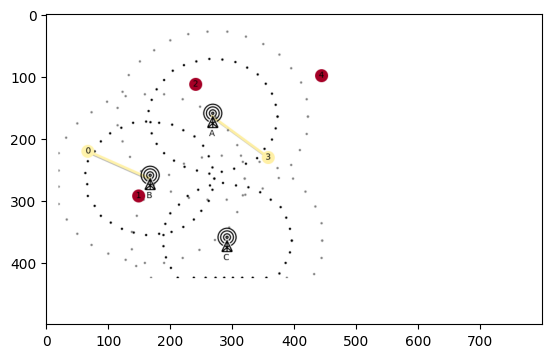

In [29]:
from mobile_env.core.base import MComCore
from mobile_env.core.entities import BaseStation, UserEquipment
# Final training environment for CL and one shot learning. 
class FinalTrainEnv(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1534,
            'reset_rng_episode': True,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        station_pos = [(110, 130), (65, 80), (120, 30)]
        stations = [
            BaseStation(bs_id, pos, **env_config["bs"])
            for bs_id, pos in enumerate(station_pos)
        ]
        num_ues = 5
        users = [UserEquipment(ue_id, **env_config["ue"]) for ue_id in range(num_ues)]

        super().__init__(stations, users, config, render_mode)

# init and render the custom scenario
env = FinalTrainEnv(render_mode="rgb_array")
env.reset()
for _ in range(10):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [7]:
def plot_env(env_name):
    """Create env, take a random step, and then render the environment."""
    env = gymnasium.make(env_name, render_mode="rgb_array")
    env.reset()
    env.step(env.action_space.sample())
    plt.imshow(env.render())
    plt.title(env_name)


In [8]:
#env = CustomEnv(config={"seed": 42})
#obs, info = env.reset(seed=42)
env.reset()
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

print("Raw observations: ", obs)

# connections and SNR are per user and station, utility just per user
obs_per_user = 2 * env.NUM_STATIONS + 1
for ue in range(env.NUM_USERS):
    print(f"\nObservations for user {ue + 1}:")
    offset = ue * obs_per_user
    print(f"Current connections to the {env.NUM_STATIONS} cells: {obs[offset:offset+env.NUM_STATIONS]}")
    print(f"SNR to the {env.NUM_STATIONS} cells: {obs[offset+env.NUM_STATIONS:offset+2*env.NUM_STATIONS]}")
    print(f"Current utility: {obs[offset+2*env.NUM_STATIONS]}")


Raw observations:  [ 0.          1.          0.          0.05922139  0.558718    1.
  0.12579602  0.          0.          0.          0.55630916  1.
  0.08976459 -1.          0.          0.          0.          1.
  0.42034608  0.07841113 -1.          0.          0.          0.
  0.5835398   1.          0.12593631 -1.          0.          0.
  0.          0.01939934  0.09379314  1.         -1.        ]

Observations for user 1:
Current connections to the 3 cells: [0. 1. 0.]
SNR to the 3 cells: [0.05922139 0.558718   1.        ]
Current utility: 0.12579602003097534

Observations for user 2:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [0.55630916 1.         0.08976459]
Current utility: -1.0

Observations for user 3:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [1.         0.42034608 0.07841113]
Current utility: -1.0

Observations for user 4:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [0.5835398  1.         0.12593631]
C

In [ ]:
# # from mobile_env.handlers.central import MComCentralHandler
# # import numpy as np


# # class CustomHandler(MComCentralHandler):
# #     # let's call the new observation "any_connection"
# #     features = MComCentralHandler.features + ["any_connection"]

# #     # overwrite the observation size per user
# #     @classmethod
# #     def ue_obs_size(cls, env) -> int:
# #         """Increase observations by 1 for each user for the new obs"""
# #         # previously: connections for all cells, SNR for all cells, utility
# #         prev_size = env.NUM_STATIONS + env.NUM_STATIONS + 1
# #         return prev_size + 1

# #     # add the new observation
# #     @classmethod
# #     def observation(cls, env) -> np.ndarray:
# #         """Concatenated observations for all users"""
# #         # get all available obs from the env
# #         obs_dict = env.features()

# #         # add the new observation for each user (ue)
# #         for ue_id in obs_dict.keys():
# #             any_connection = np.any(obs_dict[ue_id]["connections"])
# #             obs_dict[ue_id]["any_connection"] = int(any_connection)

# #         # select the relevant obs and flatten into single vector
# #         flattened_obs = []
# #         for ue_id, ue_obs in obs_dict.items():
# #             flattened_obs.extend(ue_obs["connections"])
# #             flattened_obs.append(ue_obs["any_connection"])
# #             flattened_obs.extend(ue_obs["snrs"])
# #             flattened_obs.extend(ue_obs["utility"])

# #         return flattened_obs
# # create the env with the new handler and check the obs
# env = CustomEnv(config={"handler": CustomHandler})
# obs, info = env.reset()
# obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

# print("New, raw observations: ", obs)

# # connections and SNR are per user and station, utility just per user
# obs_per_user = 2 * env.NUM_STATIONS + 2
# for ue in range(env.NUM_USERS):
#     print(f"\nObservations for user {ue + 1}:")
#     offset = ue * obs_per_user
#     print(f"Current connections to the {env.NUM_STATIONS} cells: {obs[offset:offset+env.NUM_STATIONS]}")
#     print(f"NEW: Any connection?: {obs[offset+env.NUM_STATIONS]}")
#     print(f"SNR to the {env.NUM_STATIONS} cells: {obs[offset+env.NUM_STATIONS+1:offset+2*env.NUM_STATIONS+1]}")
#     print(f"Current utility: {obs[offset+2*env.NUM_STATIONS+1]}")

In [9]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy

# train PPO agent on environment. this takes a while
model = PPO(MlpPolicy, env, tensorboard_log='results_sb', verbose=1)
model.learn(total_timesteps=500000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_27
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -38      |
| time/              |          |
|    fps             | 121      |
|    iterations      | 1        |
|    time_elapsed    | 16       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -36.7       |
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 2           |
|    time_elapsed         | 39          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014871726 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2  

In [10]:
model.save("one_shot_500000steps_V2")